# 큐(Queue)

- 선형큐, 원형큐, 연결큐, 우선순위 큐
- 큐의 활용 : 버퍼

# 큐(Queue)
- 스택과 마찬가지로 삽입과 삭제의 위치가 제한적인 자료구조
  - 큐의 뒤에서는 삽입만 하고, 큐의 앞에서는 삭제만 이루어진 구조
- 선입선출구조(FIFO : First In First Out)
  - 큐에 삽입한 순서대로 원소가 저장되어, 가장 먼저 삽입(First in)된 원소는 가장 먼저 삭제(First Out) 된다.
  - 머리(Front) : 저장된 원소 중 첫 번째 원소(또는 삭제된 위치)
  - 꼬리(Rear) : 저장된 원소 중 마지막 원소
- 큐의 기본 연산
  - 삽입 : enQueue
  - 삭제 : deQueue
- 큐의 사용을 위해 필요한 주요 연산
  |      연산    |        기능             |
  |--------------|------------------------|
  |enQueue(item) | 큐의 뒤쪽(rear 다음)에 원소를 삽입하는 연산|
  |deQueue()     | 큐의 앞쪽(front)에서 원소를 삭제하고 반환하는 연산|
  |createQueue() | 공백 상태의 큐를 생성하는 연산|
  |isEmpty()     | 큐가 공백상태인지를 확인하는 연산|
  |isFull()      | 큐가 포화상태인지를 확인하는 연산|
  |Qpeek()       | 큐의 앞쪽(front)에서 원소를 삭제 없이 반환하는 연산|
  

## 선형큐
- 1차원 배열을 이용한 큐
  - 큐의 크기 = 배열의 크기
  - front : 저장된 첫 번째 원소의 인덱스
  - rear : 저장된 마지막 원소의 인덱스

</br>

- 상태 표현
  - 초기 상태 : front = rear = -1  -> 큐가 비어있는 상태
  - 공백 상태 : front == rear 
  - 포화 상태 : rear == n-1 (n : 배열의 크기, n-1 : 배열의 마지막 인덱스)

</br>

- 초기 공백 큐 생성
  - 크기 n인 1차원 배열 생성
  - front와 rear를 -1로 초기화


### 연습문제1
  - 세 개의 데이터 1,2,3을 차례로 큐에 삽입하고
  - 큐에서 세 개의 데이터를 차례로 꺼내서 출력한다
  - 출력 결과 : 1,2,3

In [6]:
#정석형태
N = 10
q = [0] * N
front = -1
rear = -1

rear +=1
q[rear] =1  #enqueue(1)
rear += 1
q[rear] = 2 #enqueue(2)
rear += 1
q[rear] = 3 #enqueue(3)

front += 1 #dequeue
print(q[front])
front += 1 #dequeue
print(q[front])
front += 1 #dequeue
print(q[front])


#간단한 Queue
q2 = []
q2.append(10)
q2.append(20)
print(q2.pop(0))
print(q2.pop(0))

1
2
3
10
20



### 삽입 : enQueue(item)
- 마지막 원소 뒤에 새로운 원소를 삽입하기 위해
  - 1) rear 값을 하나 증가시켜 새로운 원소를 삽입할 자리를 마련
  - 2) 그 인덱스에 해당하는 배열원소 Q[rear]에 item을 저장
  - ```python
      def enQueue(item) :
        global rear
        if isFull() : print("Queue_Full")
        else :
          rear <- rear + 1;
          Q[rear] <- item
    ```

### 삭제 : deQueue()
- 가장 앞에 있는 원소를 삭제하기 위해
  - 1) front 값을 하나 증가시켜 큐에 남아있는 첫 번째 원소로 이동
  - 2) 새로운 첫번째 원소를 리턴 함으로써 삭제와 동일한 기능을 함
  - ```python
      deQueue() :
        if(isEmpty()) then Queue_Empty();
        else {
          front <- front +1 ;
          return Q[front]
        }
    ```

### 공백상태 및 포화상태 검사 : isEmpty(), isFull()
- 공백상태 : front == rear
- 포화상태 : rear == n-1(n : 배열의 크기, n-1 : 배열의 마지막 인덱스)
- ```python
    def isEmpty() :
      return front == rear
    def isFull() :
      return rear == len(Q) -1
  ```

### 검색 : Qpeek()
  - 가장 앞에 있는 원소를 검색하여 반환하는 연산
  - 현재 front의 한자리 뒤(front+1)에 있는 원소, 즉 큐의 첫번째에 있는 원소를 반환
  - ```python
      def Qpeek() :
        if isEmpty() : print("Queue_Empty")
        else : return Q[front+1]
    ```




# 원형큐 (= 순환큐)
- 선형큐 이용시의 문제점 : 잘못된 포화상태 인식
  - 선형 큐를 이용하여 원소의 삽입과 삭제를 계속할 경우, 배열의 앞부분에 활용할 수 있는 공간이 있음에도 불구하고, rear = n-1인 상태 즉, 포화상태로 인식하여 더이상의 삽입을 수행하지 않게 됨.
- 해결 방법1
  -  매 연산이 이루어질 때마다 저장된 원소들을 배열의 앞부분으로 모두 이동시킴.
  - 원소 이동에 많은 시간이 소요되어 큐의 효율성이 급격히 떨어짐
- 해결 방법2
  - 1차원 배열을 사용하되, 논리적으로는 배열의 처음과 끝이 연결되어 원형 형태의 큐를 이룬다고 가정하고 사용
  - 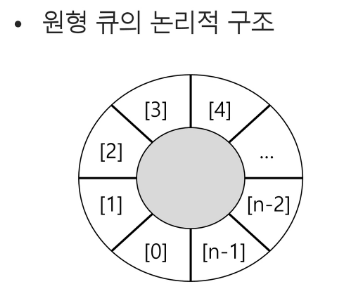

  
- 초기 공백 상태 : front = rear = 0
- index의 순환
  - front 와 rear의 위치가 배열의 마지막 인덱스인 n-1를 가리킨 후, 그 다음에는 논리적 순환을 이루어 배열의 처음 인덱스인 0으로 이동해야 함
  - 이를 위해 나머지 연산자 mod(%)를 사용함
    - N-n % N = N-n
    - N % N = 0
    - 본인과 같은 값으로 나눌때만 0이 나옴(인덱스 0으로 이동)
    - 그 이하의 값일 때는 그대로 나누기 전의 값이 나옴
    - 그래서 항상 N을 벗어나지 않고 범위 내에 있을 수 있도록 해줌
- front 변수
  - 공백 상태와 포화 상태 구분을 쉽게 하기 위해 front가 있는 자리는 사용하지 않고 항상 빈자리로 둠
  - front 외의 모든 칸이 차있는 상태가 Full
  - 삽입 위치 및 삭제 위치
    |      |삽입 위치|삭제 위치|
    |------|--------|---------|
    |선형큐| rear += 1| front += 1|
    |원형큐|rear = (rear+1) % n | front = (front+1) % n |
- ![원형큐 연산과정1.PNG](<attachment:원형큐 연산과정1.PNG>)
- ![원형큐 연산과정2.PNG](<attachment:원형큐 연산과정2.PNG>)
- ![원형큐 연산과정3.PNG](<attachment:원형큐 연산과정3.PNG>)
- 초기 공백 큐 생성하는 방법
  - 크기 n인 1차원 배열 생성
  - front와 rear를 0으로 초기화
- 공백 상태 및 포화 상태 검사 : isEmpty(), isFull()
  - 공백 상태 : front == rear
  - 포화 상태 : 삽입할 rear 의 다음 위치 == 현재 front
    - (rear+1) % n == front
- 삽입 : enQueue(item)
  - 마지막 원소 뒤에 새로운 원소를 삽입하기 위해
    - 1) rear 값을 조정하여 새로운 원소를 삽입할 자리를 마련함
        - rear <- (rear+1) mod n;
    - 2) 그 인덱스에 해당하는 배열원소 cQ[rear]에 item을 저장
  - ```python
      def enQueue(item) :
        global rear
        if isFull() :
          print("Queue_Full")
        else :
          rear = (rear+1) % len(cQ)
          cQ[rear] = item
    ```
- 삭제 : deQueue(), delete()
  - 가장 앞에 있는 원소를 삭제하기 위해
    - 1) front 값을 조정하여 삭제할 자리를 준비함
    - 2) 새로운 front 원소를 리턴함으로써 삭제와 동일한 기능을 함
    - ```python
      def deQueue() :
        global front
        if isEmpty() :
          print("Queue_Empty")
        else :
          front = (front+1) % len(cQ)
          return cQ[front]
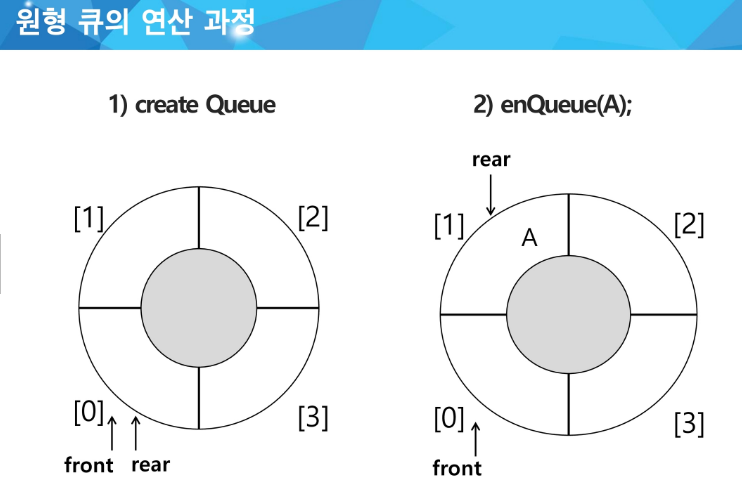
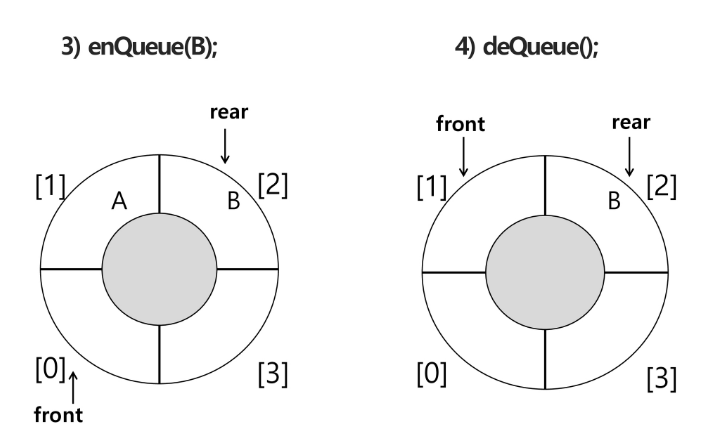
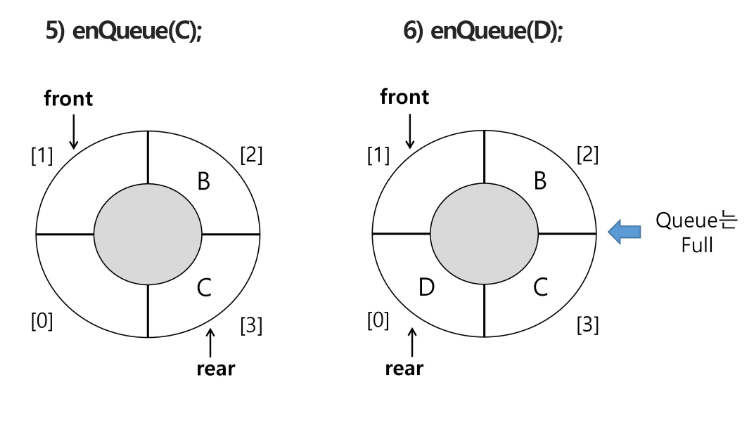

In [7]:
# 원형큐

cQ = [0] * 4
q_size = 4
front = rear = 0

#enq(1)
rear = (rear+1) % q_size
cQ[rear] = 1

rear = (rear+1) % q_size
cQ[rear] = 2

rear = (rear+1) % q_size
cQ[rear] = 3

front = (front+1) % q_size
print(cQ[front])

front = (front+1) % q_size
print(cQ[front])

front = (front+1) % q_size
print(cQ[front])

rear = (rear+1) % q_size
cQ[rear] = 10

rear = (rear+1) % q_size
cQ[rear] = 20

1
2
3


# 연결큐
- 대기업 목표로 한다면 알고 있어야 함. 나머지는 개념정도만 가볍게 알고 있어도 됨
- 단순 연결 리스트를 이용한 큐
  - A4 용지 끝에 다음 페이지를 적어두는 느낌(다음페이지를 적어둔 것을 노드라고 함)
  - 큐의 원소 : 단순 연결 리스트의 노드
  - 큐의 원소 순서 : 노드의 연결 순서. 링크로 연결되어 있음
  - front : 첫 번째 노드를 가리키는 링크
  - rear : 마지막 노드를 가리키는 링크
  - null : 주소값을 가지고 있지 않은 공백 상태
- 상태 표현
  - 초기 상태 : front = rear = null
  - 공백 상태 : front = rear = null
  - 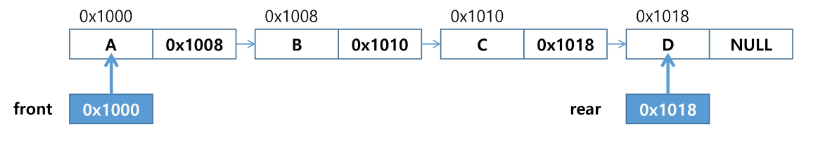

## [참고]Deque(덱) 
- 컨테이너 자료형 중 하나
- 연결 리스트 형태를 알아서 구현해줌
- 사이즈가 큰 큐를 만들어야 하는 경우(1000개 이상) 덱을 사용하면 속도가 빠름
- deque 객체
  - 양쪽 끝에서 빠르게 추가와 삭제를 할 수 있는 리스트류 컨테이너
- 연산
  - append(x) : 오른쪽에 x 추가
  - popleft() : 왼쪽에서 요소를 제거하고 반환. 요소가 없으면 indexError

# 우선순위 큐
- 이런게 있다 정도로만
- 우선순위를 가진 항목들을 저장하는 큐
- FIFO 순서가 아니라 우선순위가 높은 순서대로 먼저 나가게 된다.
- 매번 정렬을 새롭게 하는 것은 아니고, 삽입할 때 우선순위가 높으면 앞에 둔다
- 배열을 이용한 우선순위 큐 구현
  - 배열을 이용하여 자료 저장
  - 원소를 삽입하는 과정에서 우선순위를 비교하여 적절한 위치에 삽입하는 구조
  - 가장 앞에 최고 우선순위의 원소가 위치하게 됨
  - 문제점 
    - 배열을 사용하므로, 삽입이나 삭제 연산이 일어날 때 원소의 재배치가 발생함.
    - 이에 소요되는 시간이나 메모리 낭비가 큼
    

# 버퍼
- 데이터를 한 곳에서 다른 한 곳으로 전송하는 동안 일시적으로 그 데이터를 보관하는 메모리 영역
- 버퍼링 : 버퍼를 활용하는 방식 또는 버퍼를 채우는 동작을 의미
- 버퍼의 자료 구조
  - 버퍼는 일반적으로 입출력 및 네트워크와 관련된 기능에서 이용된다.
  - 순서대로 입력/출력/전달 되어야 하므로 FIFO 방식의 자료구조인 큐가 활용된다.
  

In [ ]:
# 참고 실행시간 확인

from collections import deque
from time import time
start = time()      #코드가 시작할 때 시간 저장

Q = deque()
for i in range(QSIZE):
    Q.append(i)

while Q:
    Q.popleft()

print(time() - start)   # 현재 시간 - 코드가 시작할 때 시작 = 실행 시간
